In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
train_image_gen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,rotation_range=40)
test_image_gen = ImageDataGenerator(rescale=1./255)

In [3]:
train_data = train_image_gen.flow_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/train',color_mode='grayscale',target_size=(224,224),batch_size=32,class_mode='binary')
test_data = test_image_gen.flow_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/test',color_mode='grayscale',target_size=(224,224),batch_size=32,class_mode='binary')
val_data = test_image_gen.flow_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/val',color_mode='grayscale',target_size=(224,224),batch_size=32,class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


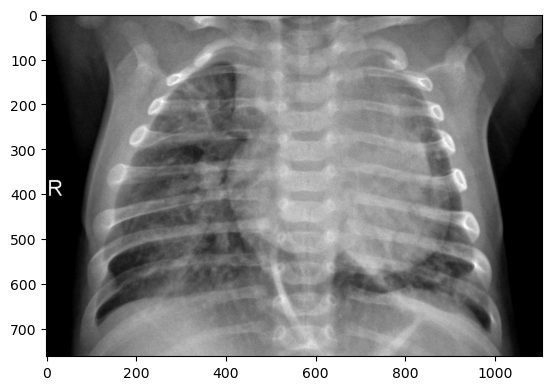

In [4]:
img = keras.utils.load_img("/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg")
plt.imshow(img)

In [5]:
train_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [6]:
model=Sequential([
    Conv2D(64,3,activation='relu',input_shape=(224,224,1)),
    MaxPooling2D(),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')

])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history=model.fit(train_data,batch_size=32,steps_per_epoch=5,epochs=25,validation_data=val_data)

Epoch 1/25
5/5 [==============================] - 17s 3s/step - loss: 0.2593 - accuracy: 0.8813 - val_loss: 0.9648 - val_accuracy: 0.6250
Epoch 2/25
5/5 [==============================] - 18s 3s/step - loss: 0.2158 - accuracy: 0.9312 - val_loss: 0.7390 - val_accuracy: 0.6875
Epoch 3/25
5/5 [==============================] - 17s 3s/step - loss: 0.2657 - accuracy: 0.8813 - val_loss: 1.2826 - val_accuracy: 0.5625
Epoch 4/25
5/5 [==============================] - 17s 3s/step - loss: 0.2492 - accuracy: 0.8938 - val_loss: 1.0077 - val_accuracy: 0.6250
Epoch 5/25
5/5 [==============================] - 17s 3s/step - loss: 0.2320 - accuracy: 0.9000 - val_loss: 1.1976 - val_accuracy: 0.5625
Epoch 6/25
5/5 [==============================] - 17s 3s/step - loss: 0.2611 - accuracy: 0.9250 - val_loss: 0.4946 - val_accuracy: 0.9375
Epoch 7/25
5/5 [==============================] - 17s 3s/step - loss: 0.2499 - accuracy: 0.8625 - val_loss: 0.7531 - val_accuracy: 0.5625
Epoch 8/25
5/5 [==================

In [13]:
model.evaluate(test_data)[1]

20/20 [==============================] - 18s 871ms/step - loss: 0.3347 - accuracy: 0.8670


0.8669871687889099

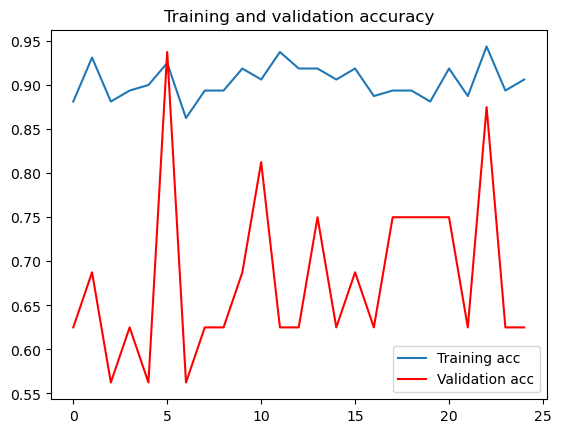

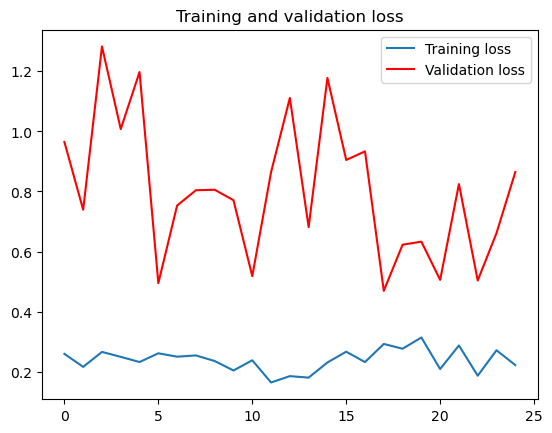

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc,label='Training acc')
plt.plot(val_acc,color='red',label='Validation acc')
plt.xlabel='epochs'
plt.ylabel='accuracy'
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(loss,label='Training loss')
plt.plot(val_loss,color='red',label='Validation loss')
plt.xlabel='epochs'
plt.ylabel='loss'
plt.title('Training and validation loss')
plt.legend()

plt.show()

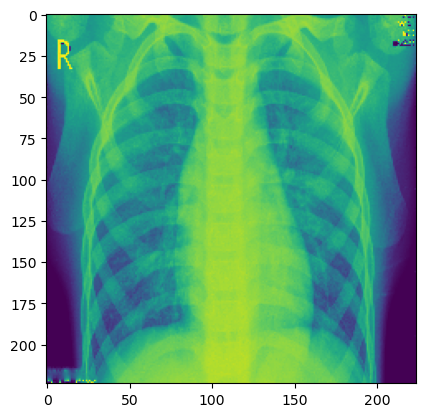

1/1 [==============================] - 0s 171ms/step
PNEUMONIA


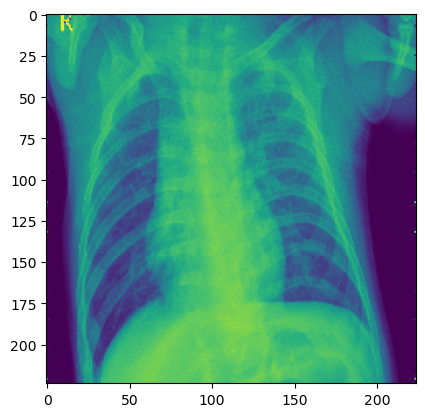

1/1 [==============================] - 0s 56ms/step
PNEUMONIA


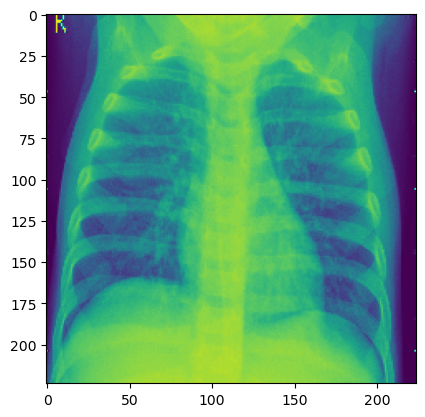

1/1 [==============================] - 0s 48ms/step
PNEUMONIA


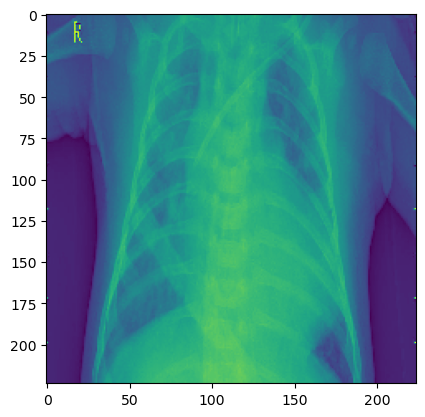

1/1 [==============================] - 0s 59ms/step
PNEUMONIA


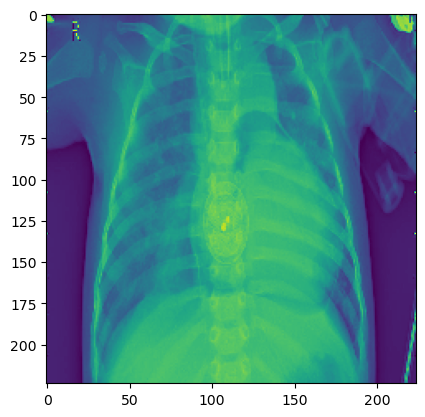

1/1 [==============================] - 0s 54ms/step
PNEUMONIA


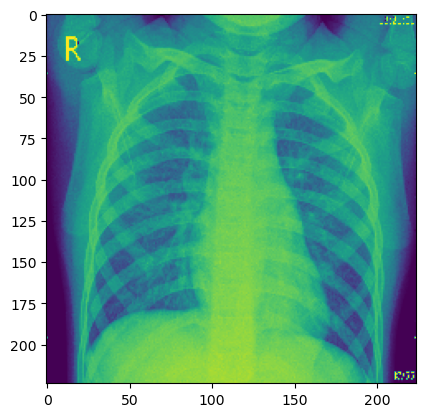

1/1 [==============================] - 0s 51ms/step
PNEUMONIA


In [16]:
# checking whether if the model is correctly predicting the 'pneumonia' examples.
import os
dir_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA"
for i in os.listdir(dir_path)[:6]:
    img = keras.utils.load_img(dir_path+'/'+i,target_size=(224,224),color_mode='grayscale')
    plt.imshow(img)
    plt.show()
    x = keras.utils.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val = model.predict(images)
    if val == 1:
        print("PNEUMONIA")
    else:
        print("NORMAL")